# KEY INDICATORS OF HEART DISEASE


The dataset for this project was derived from Kaggle. The dataset was originally provided by the Centre for Disease Control (CDC) as an integral part of their Behavioural risk factor surveillance system for gathering data on the state of health of residents of the United States. The features in this dataset are being used as key indicators that can be used in the prediction of heart disease.Necessary packages needed for the analysis and evaluation of the dataset were successfully imported. 


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import random
import seaborn as sns
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,f1_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import StratifiedKFold, cross_validate

The dataset was loaded successfully using the pandas package and it was csv file was read.

In [2]:
#Loading the Dataset
kwaku = pd.read_csv('heart_2020_cleaned.csv')
kwaku

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very Good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very Good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very Good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very Good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


# DATA STRUCTURE AND STATISTICAL ANALYSIS


The structure of the dataset was printed as well in order to know the distribution of the dataset. The size, shape and number of rows and columns as well as the data type of every column was also visualized. The statistical measures of the dataset such as the mean, mode, standard deviation was also displayed.


In [3]:
#Checking the first 10n rows of the dataset
kwaku.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very Good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very Good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very Good,8,No,No,No
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
6,No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
7,No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
8,No,26.45,No,No,No,0,0,No,Female,80 or older,White,No borderline diabetes,No,Fair,5,No,Yes,No
9,No,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No


In [4]:
#Checking the last 10 rows of the dataset
kwaku.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,No,31.93,No,Yes,No,0,0,No,Male,65-69,Hispanic,No,Yes,Good,7,No,No,No
319786,Yes,33.20,Yes,No,No,0,0,No,Female,60-64,Hispanic,Yes,Yes,Very Good,8,Yes,No,No
319787,No,36.54,No,No,No,7,0,No,Male,30-34,Hispanic,No,No,Good,9,No,No,No
319788,No,23.38,No,No,No,0,0,No,Female,60-64,Hispanic,No,Yes,Excellent,6,No,No,No
319789,No,22.22,No,No,No,0,0,No,Female,18-24,Hispanic,No,Yes,Excellent,8,No,No,No
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very Good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No
319794,No,46.56,No,No,No,0,0,No,Female,80 or older,Hispanic,No,Yes,Good,8,No,No,No


In [5]:
#CHECKING THE NUMBER OF ROWS AND COLUMNS
kwaku.shape

(319795, 18)

In [6]:
#CHECKING THE SIZE OF THE DATASET
kwaku.size

5756310

In [7]:
#CHECKING FOR THE DATA TYPES IN THE DATASET
kwaku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
#CHECKING THE STATISTICAL MEASURES OF THE DATASET
kwaku.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# DATA PREPROCESSING 

The number of duplicated values as well as the number of missing values were also printed, and it was established that there were neither any missing nor duplicated values.

In [9]:
#CHECKING FOR DUPLICATE VALUES
kwaku.duplicated().sum()

18078

In [10]:
# Remove duplicates based on all columns
kwaku.drop_duplicates(inplace=True)

In [11]:
#CHECKING FOR DUPLICATE VALUES
kwaku.duplicated().sum()

0

In [12]:
#CHECKING THE COLUMNS  IN THE DATASET
kwaku.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [13]:
#CHECKING FOR THE NUMBER OF MISSING VALUES IN THE DATASET
kwaku.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# EXPLORATORY DATA ANALYSIS AND VISUALIZATION



In order to gain better understanding of the trends and patterns of the dataset, the number of categorical and numerical columns were displayed as well as the number of unique values in both columns and they were finally visualized in order to get a visual presentation of the dataset.

In [14]:
#CHECKING FOR THE NUMBER OF CATEGORICAL COLUMNS
cat = kwaku.select_dtypes(include='object').columns
len(cat)

14

In [15]:
#CHECKING FOR UNIQUE VALUES IN THE CATEGORICAL COLUMNS
for i in cat:
    print("The no.of unique values in",i,"are: ",kwaku.loc[:,i].nunique())

The no.of unique values in HeartDisease are:  2
The no.of unique values in Smoking are:  2
The no.of unique values in AlcoholDrinking are:  2
The no.of unique values in Stroke are:  2
The no.of unique values in DiffWalking are:  2
The no.of unique values in Sex are:  2
The no.of unique values in AgeCategory are:  13
The no.of unique values in Race are:  6
The no.of unique values in Diabetic are:  4
The no.of unique values in PhysicalActivity are:  2
The no.of unique values in GenHealth are:  5
The no.of unique values in Asthma are:  2
The no.of unique values in KidneyDisease are:  2
The no.of unique values in SkinCancer are:  2


UNIVARIATE ANALYSIS

A visual statistical analysis for all the categorical and numerical columns was generated in order to gain an understanding about its characteristics.

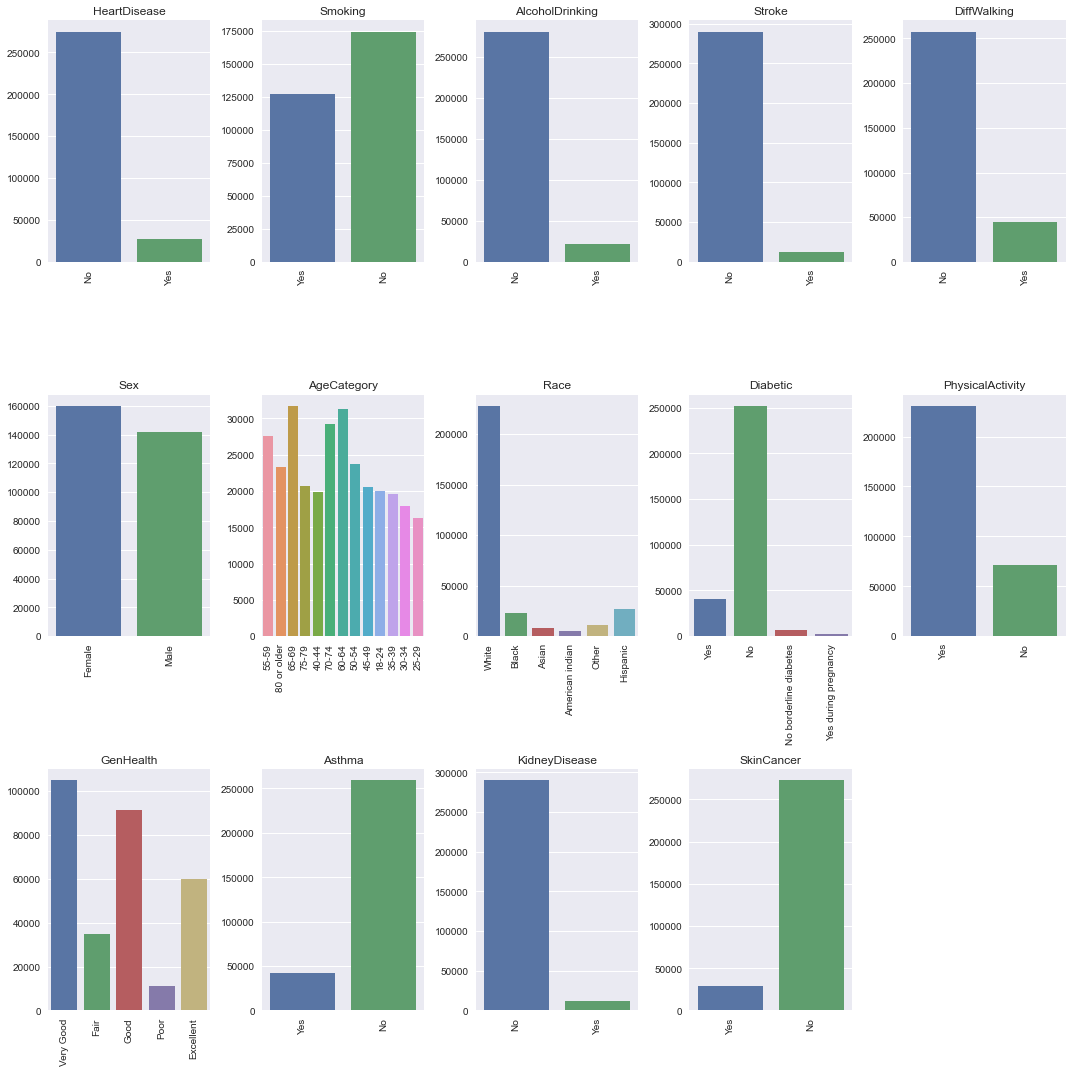

In [16]:
#visualizing categorical columns
num_plots = len(cat)
num_cols = 5
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cat):
    sns.countplot(x=col, data=kwaku, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
for i in range(num_plots, num_rows*num_cols):
    axes[i].set_visible(False)
fig.tight_layout()
plt.show()

In [17]:
#CHECKING FOR THE NUMBER OF NUMERICAL VALUES
num = kwaku.select_dtypes(include=np.number).columns
len(num)

4

In [18]:
#CHECKING FOR UNIQUE VALUES IN THE NUMERICAL COLUMNS
for i in num:
    print("The no.of unique values in",i,"are: ",kwaku.loc[:,i].nunique())

The no.of unique values in BMI are:  3604
The no.of unique values in PhysicalHealth are:  31
The no.of unique values in MentalHealth are:  31
The no.of unique values in SleepTime are:  24


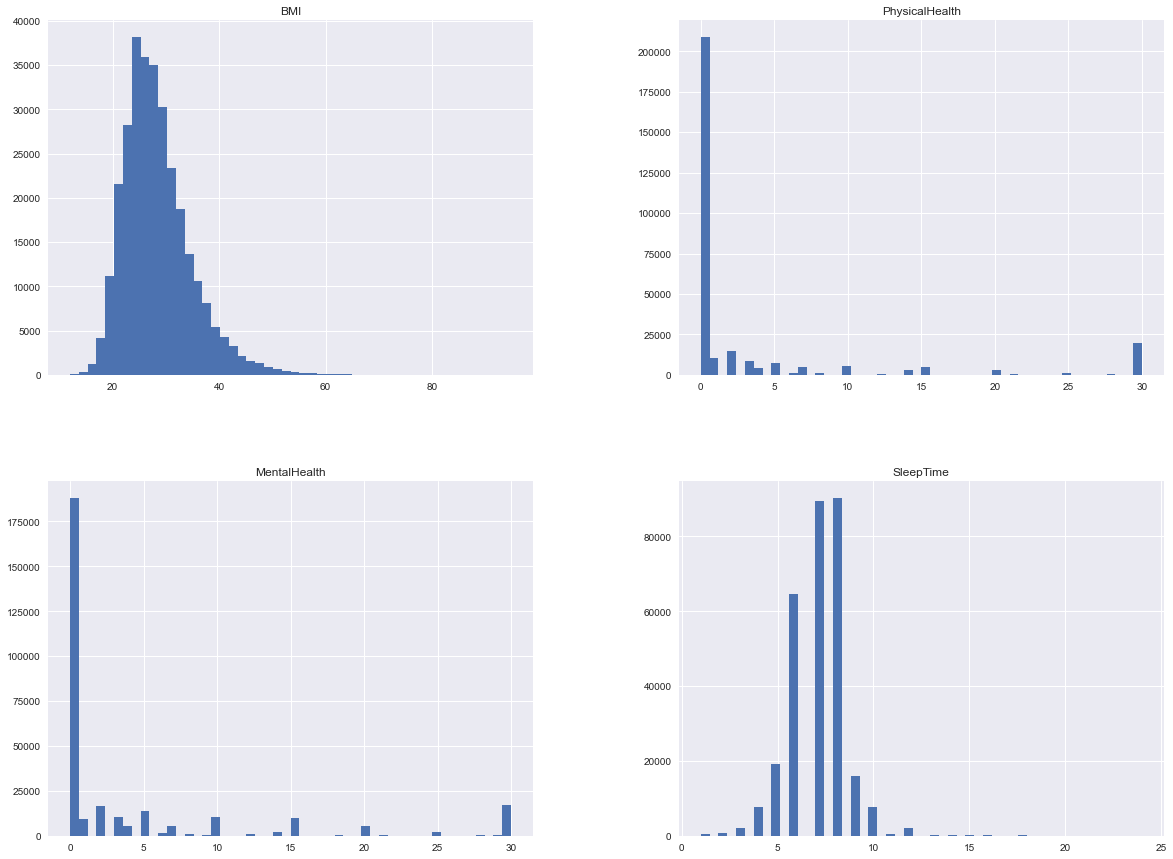

In [19]:
# visualizing the numerical columns
#histogram for each numerical columns
kwaku.hist(bins=50, figsize=(20,15))
plt.show()

The target variable was visualised in order to know and understand the distribution of data in the target variable, and it was inferred that there was an issue of class imbalance in the dataset.

[Text(0, 0, '274456'), Text(0, 0, '27261')]

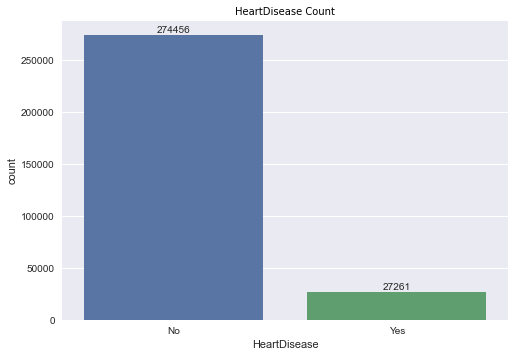

In [20]:
#visualizing and exploring of dataset
#checking if the target variable is binary
ax=sns.countplot(x='HeartDisease', data=kwaku)
plt.title('HeartDisease Count', color='Black',font='DejaVu Sans')
ax.bar_label(ax.containers[0])

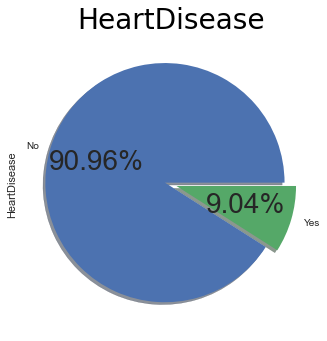

In [21]:
# visualizing The target variable
plt.rcParams.update({'font.size': 28})
kwaku['HeartDisease'].value_counts().plot.pie(explode=[0.05, 0.05],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('HeartDisease',color='Black',loc='center',font='DejaVu Sans');

## BIVARIATE ANALYSIS

An analysis of the features against the target variable was also generated in order to understand the relationship between all the indicators and the target variable heart disease and it was obvious that there was a direct relationship between some indicators and the target variable, indicators like physical activity showed that, the higher your rate of physical activity the lower the chances of heart diseases are.

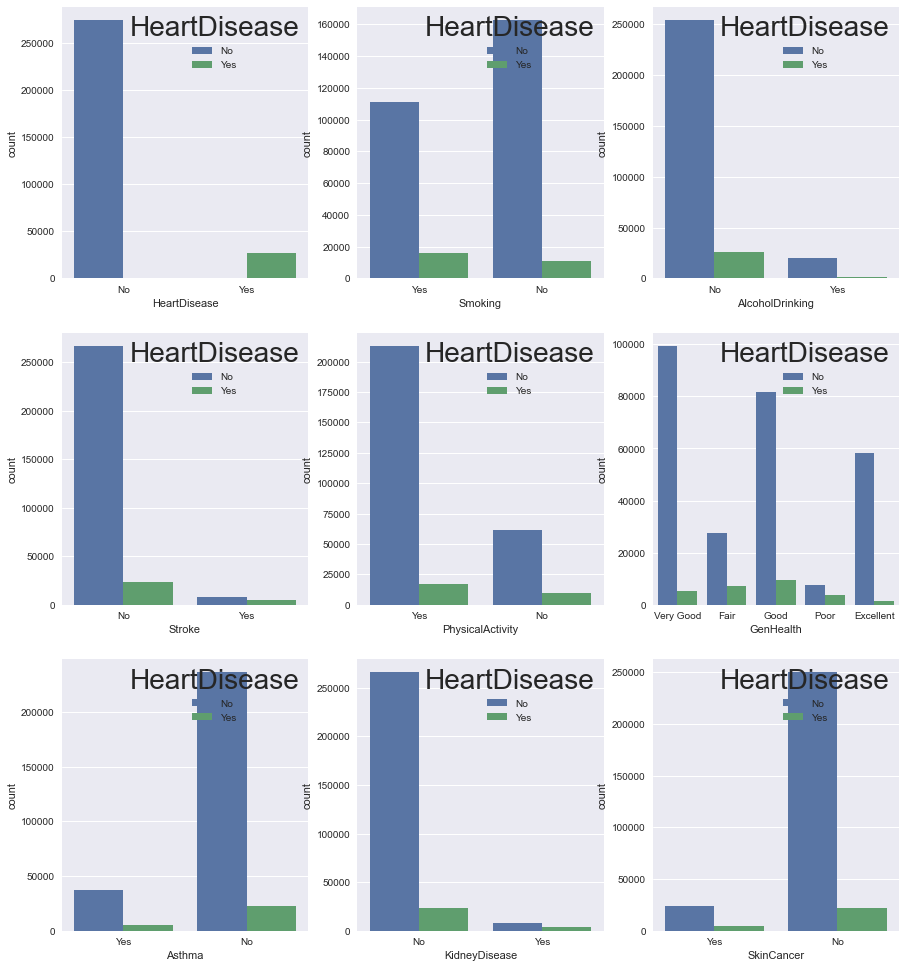

In [22]:
# Visualizing the categorical columns
cat_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke','PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

fig, ax = plt.subplots(3, 3, figsize = (15, 17))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=kwaku, ax=ax[i // 3, i % 3], hue = "HeartDisease")
plt.show()

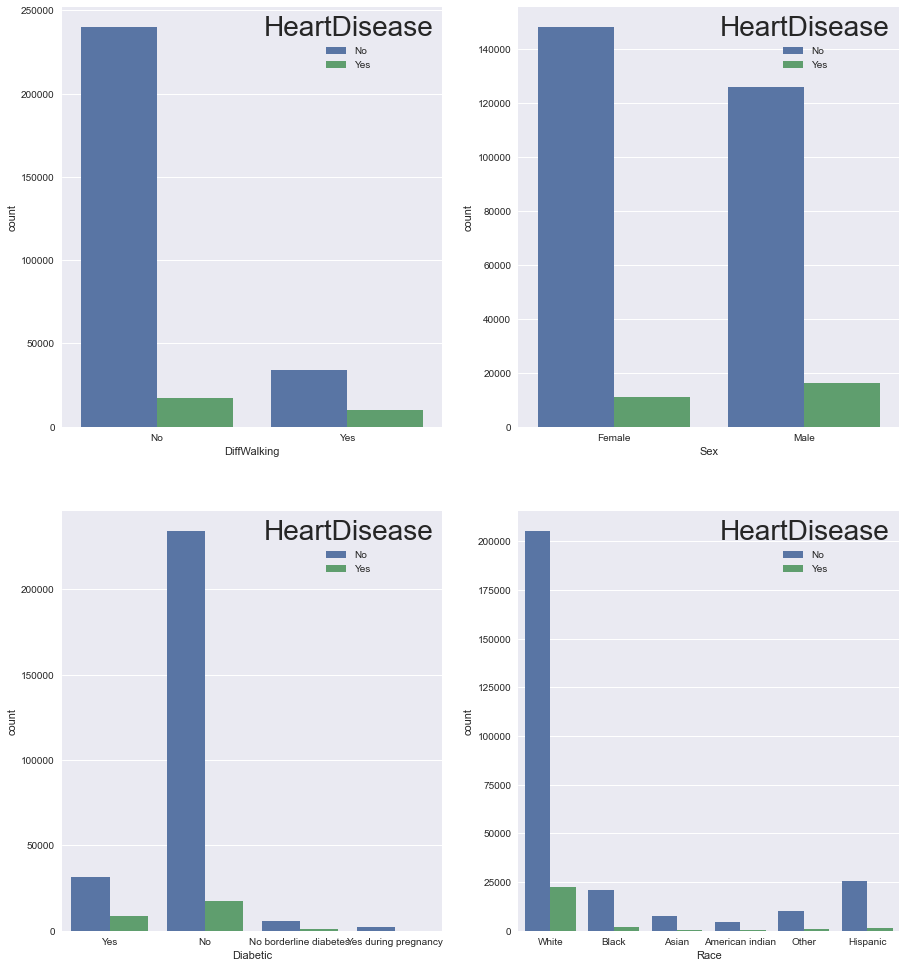

In [23]:
cat_cols =['DiffWalking','Sex', 'Diabetic' , 'Race']
fig, ax = plt.subplots(2, 2, figsize = (15, 17))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=kwaku, ax=ax[i // 2, i % 2], hue = "HeartDisease")
plt.show()

The AgeCategory column was also visualised in order to understand the distribution of cases of heart disease across the various age categories. An observation that was drawn from this comparative analysis was that individuals who were 80 or older recorded most cases of heart disease.

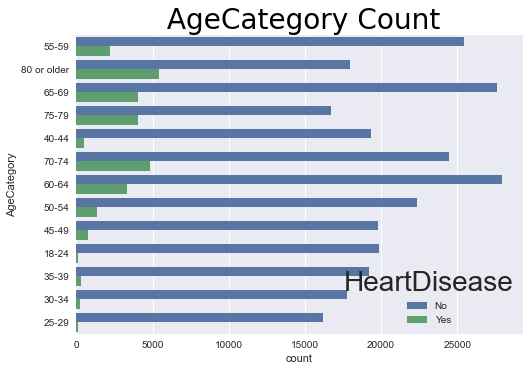

In [24]:
#Data distribution of cases with Yes/No heart disease accodring AgeCategory
sns.countplot(y='AgeCategory',hue='HeartDisease', data=kwaku)
plt.title(' AgeCategory Count',color='Black',font='DejaVu Sans');

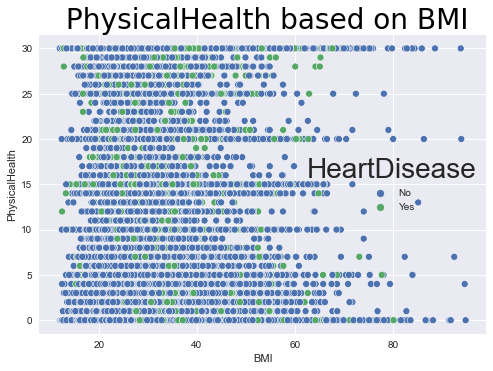

In [25]:
#scatter plot to show the distribution of Physica Health based on BMI
fig,ax = plt.subplots()
sns.scatterplot(data=kwaku, x='BMI',y='PhysicalHealth', hue = 'HeartDisease')
plt.title(' PhysicalHealth based on BMI',color='Black',font='DejaVu Sans');
plt.show()

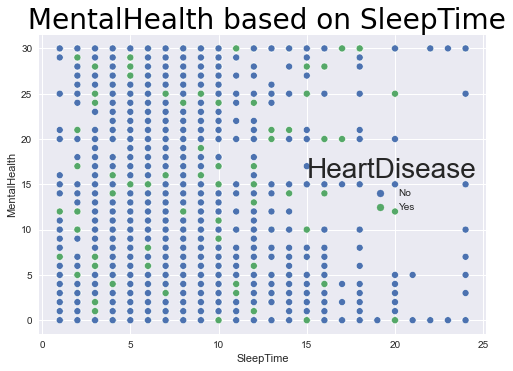

In [26]:
#scatter plot to show the distribution of Mental Health based on SleepTime
fig,ax = plt.subplots()
sns.scatterplot(data=kwaku, x='SleepTime',y='MentalHealth', hue = 'HeartDisease')
plt.title(' MentalHealth based on SleepTime',color='Black',font='DejaVu Sans');
plt.show()

A correlation heatmap was also generated in order to understand the correlation that exists between the numerical columns in the dataset, and this showed how closely related these numerical columns are to different outcomes.

Text(0.5, 1.0, 'Correlation Heatmap')

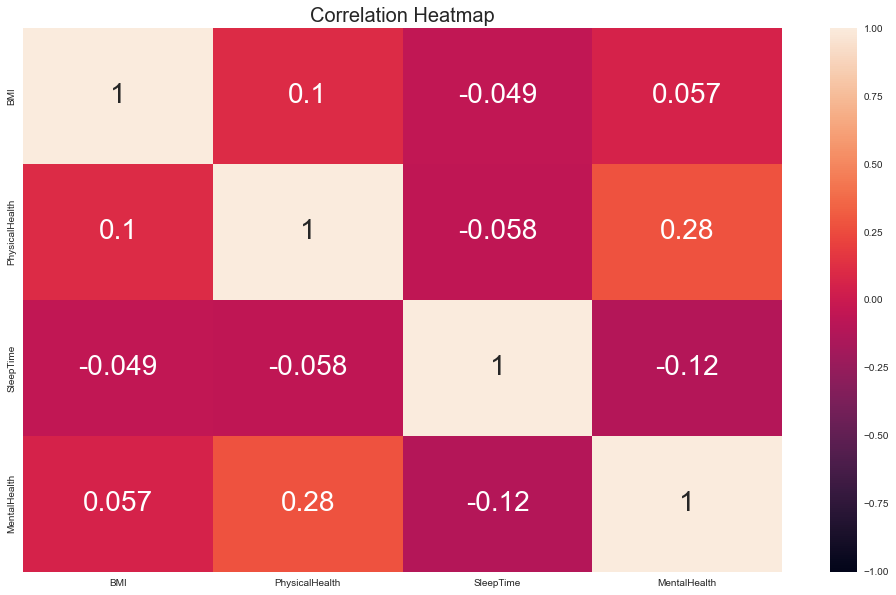

In [27]:
#Plotting the correlation matrix for the numerical columns
num_cols=['BMI','PhysicalHealth','SleepTime','MentalHealth']
corr_matrix =kwaku[num_cols].corr()
plt.figure(figsize=(17,10))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontsize=20)

# FEATURE ENGINEERING

Encoding was used to convert the categorical variables into numerical variable in preparation for the implementation of the various models. Columns like smoking, stroke and other categorical columns were replaced with 1 and 0 replacing yes and no respectively. The race, diabetic status, GenHealth and AgeCategory columns were also encoded by replacing their variables with unique numerical variables.

In [28]:
#ENCODING
#CHANGING CATEGORICAL COLUMNS TO NUMERICAL COLUMNS 
change_dtype = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
change_dtype

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [29]:
#Changing categorical values to numerical values
for i in change_dtype:
    kwaku[i] = kwaku[i].replace({'Yes':1,'No':0})

In [30]:
#Checking the head of the dataset after encoding 
kwaku.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,Female,55-59,White,Yes,1,Very Good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,Female,80 or older,White,No,1,Very Good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,Male,65-69,White,Yes,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,Female,75-79,White,No,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,Female,40-44,White,No,1,Very Good,8,0,0,0


In [31]:
#Encoding
cat = kwaku.select_dtypes(include='object').columns
cat

Index(['Sex', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth'], dtype='object')

In [32]:
# Encoding
kwaku['Sex']=kwaku['Sex'].replace({'Male':1,'Female':0})

In [33]:
kwaku['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [34]:
kwaku['AgeCategory']=kwaku['AgeCategory'].map(kwaku['AgeCategory'].value_counts(normalize=True))

In [35]:
change_dtype = ['Race']
change_dtype

['Race']

In [36]:
for i in change_dtype:
    kwaku[i] = kwaku[i].replace({'American indian':0,'Asian':1,'Black':2,'Hispanic':3,'White':4,'Other':5})

In [37]:
change_dtype = ['GenHealth']
change_dtype

['GenHealth']

In [38]:
for i in change_dtype:
    kwaku[i] = kwaku[i].replace({'Excellent':0,'Fair':1,'Good':2,'Poor':3,'Very Good':4})

In [39]:
change_dtype = ['Diabetic']
change_dtype

['Diabetic']

In [40]:
for i in change_dtype:
    kwaku[i] = kwaku[i].replace({'No':0,'No borderline diabetes':1,'Yes':2,'Yes during pregnancy':3})

In [41]:
#Checking the first 10 rows after encoding
kwaku.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,0.091510,4,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,0.077397,4,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,0.104966,4,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,0.068650,4,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,0.065747,4,0,1,4,8,0,0,0
5,1,28.87,1,0,0,6,0,1,0,0.068650,2,0,0,1,12,0,0,0
6,0,21.63,0,0,0,15,0,0,0,0.097021,4,0,1,1,4,1,0,1
7,0,31.64,1,0,0,5,0,1,0,0.077397,4,2,0,2,9,1,0,0
8,0,26.45,0,0,0,0,0,0,0,0.077397,4,1,0,1,5,0,1,0
9,0,40.69,0,0,0,0,0,1,1,0.104966,4,0,1,2,10,0,0,0


In [42]:
#Checking the data types of the columns after encoding
kwaku.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  int64  
 6   MentalHealth      301717 non-null  int64  
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  float64
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  int64  
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     30

The numerical columns were also checked for outliers in the dataset, and it can be inferred from the figures below that there were no outliers.

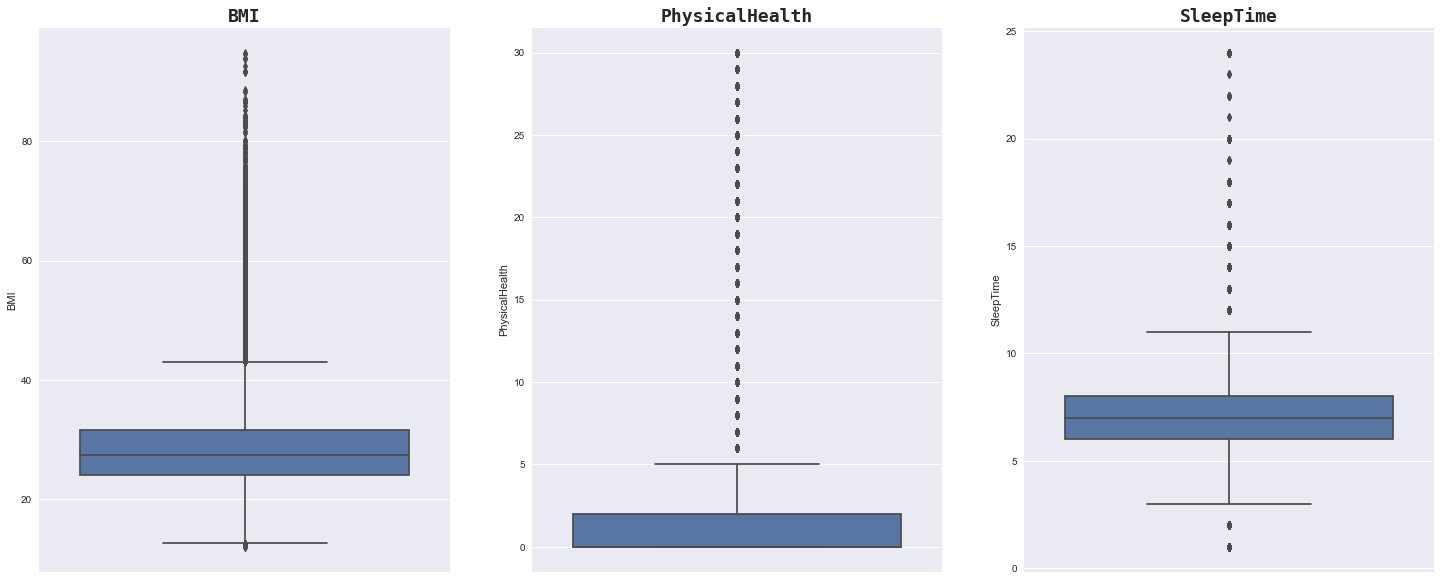

In [43]:
#Step 24:Checking for outliers in the data set with a boxplot
num_cols=['BMI','PhysicalHealth','SleepTime']

fig, ax = plt.subplots(1, 3, figsize = (25, 10))
for i, col in enumerate(num_cols):
    g = sns.boxplot(data = kwaku, y = col, ax = ax[i], palette = "deep")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

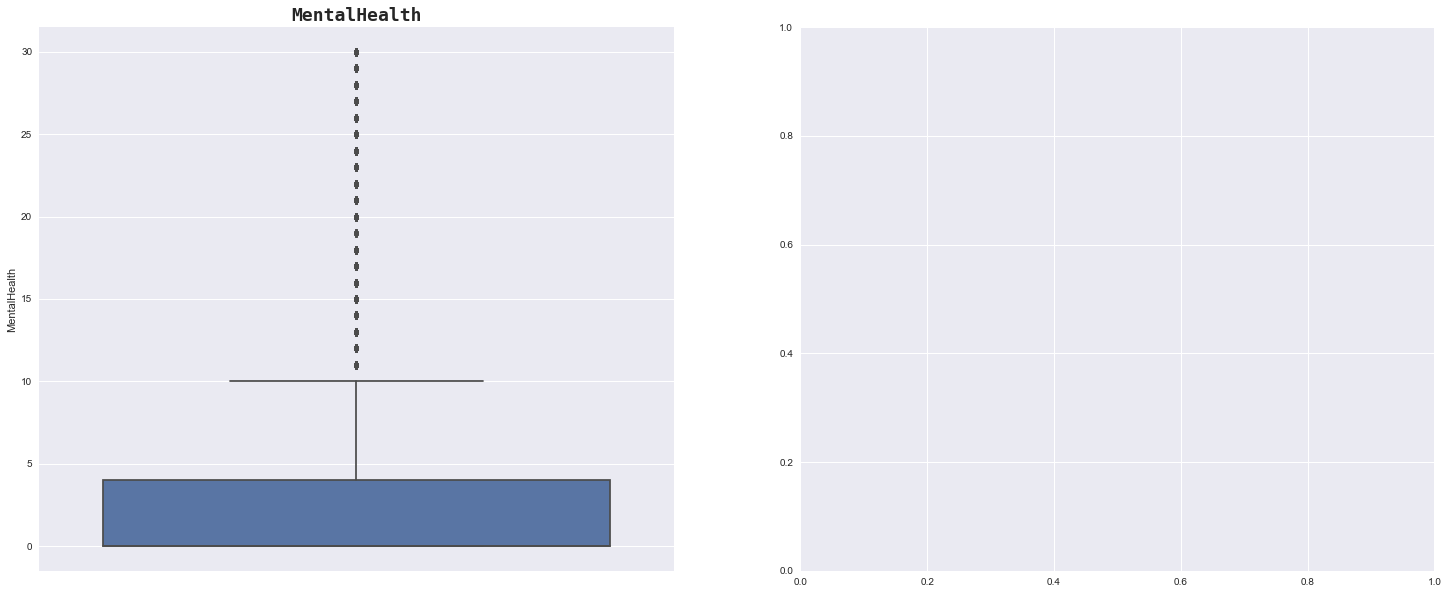

In [44]:
num_cols=['MentalHealth']

fig, ax = plt.subplots(1, 2, figsize = (25, 10))
for i, col in enumerate(num_cols):
    g = sns.boxplot(data = kwaku, y = col, ax = ax[i], palette = "deep")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

The dataset was now split into training and testing sets by importing the ‘train_test_split’ library. The test size parameter was then set to ‘0.2’, that is 20% of the data being used for the testing set and 80% being used for the training set.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,f1_score

In [46]:
#Splitting the data to Train and Test
#Splitting into training set and test set
#80% training and 20% test
from sklearn.model_selection import train_test_split,KFold
x = kwaku.drop('HeartDisease', axis = 1)#features
y = kwaku['HeartDisease']#target variable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

Scaling the numerical features was required to produce good results because some of the algorithms used for this project, that is logistic regression requires data scaling to function properly without noisy data and to produce excellent results.

In [47]:
#standardizing the data using Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train_scaler = pd.DataFrame(x_train_scaler, columns=x.columns)
x_test_scaler = pd.DataFrame(x_test_scaler, columns=x.columns)
display(x_train_scaler.head())
display(x_test_scaler.head())

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1.079644,-0.855373,-0.278613,-0.203872,-0.438807,-0.014728,-0.415213,-0.942556,-0.103762,0.390532,-0.433843,0.556676,-1.469040,-0.057394,-0.406272,-0.200631,-0.327453
1,-0.623752,1.169081,-0.278613,-0.203872,-0.438807,-0.506761,-0.415213,1.060945,-0.697892,1.496641,-0.433843,0.556676,-0.145645,-0.738815,-0.406272,-0.200631,-0.327453
2,-0.330063,1.169081,-0.278613,-0.203872,-0.438807,-0.506761,-0.415213,1.060945,0.657620,0.390532,-0.433843,0.556676,1.177751,-0.057394,2.461405,-0.200631,-0.327453
3,1.262041,-0.855373,-0.278613,-0.203872,-0.438807,-0.506761,-0.415213,-0.942556,-0.697892,0.390532,-0.433843,0.556676,1.177751,1.305448,-0.406272,-0.200631,-0.327453
4,-0.280599,-0.855373,-0.278613,-0.203872,-0.070129,-0.506761,2.408400,-0.942556,1.455558,0.390532,-0.433843,-1.796379,0.516053,0.624027,-0.406272,-0.200631,-0.327453


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.860150,-0.855373,-0.278613,-0.203872,3.247980,3.183489,2.408400,-0.942556,-0.179232,-1.821688,-0.433843,-1.796379,-0.807343,-2.783077,-0.406272,-0.200631,-0.327453
1,-0.343974,-0.855373,-0.278613,-0.203872,-0.438807,-0.506761,-0.415213,-0.942556,0.984460,0.390532,-0.433843,0.556676,-1.469040,0.624027,-0.406272,-0.200631,-0.327453
2,0.005361,1.169081,3.589204,-0.203872,-0.438807,0.723322,-0.415213,1.060945,-1.562849,0.390532,-0.433843,0.556676,-1.469040,-0.057394,-0.406272,-0.200631,-0.327453
3,-1.181761,-0.855373,-0.278613,-0.203872,-0.438807,-0.506761,-0.415213,-0.942556,-0.103762,0.390532,-0.433843,0.556676,1.177751,0.624027,-0.406272,-0.200631,-0.327453
4,-0.401166,-0.855373,-0.278613,-0.203872,-0.438807,-0.260745,-0.415213,-0.942556,0.657620,0.390532,-0.433843,0.556676,1.177751,0.624027,-0.406272,-0.200631,-0.327453


After scaling the dataset, the shape of the train and test set was printed in order to get an overview of the dataset.

In [48]:
# checking the shape of the train and test datasets

print("The shape of x_train_scaler is: ",x_train_scaler.shape)
print("The shape of x_test_scaler is: ",x_test_scaler.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_scaler is:  (241373, 17)
The shape of x_test_scaler is:  (60344, 17)
The shape of y_train is:  (241373,)
The shape of y_test is:  (60344,)


The baseline model was also created to serve as a point of reference for the performance other models that they will also be trained on the train and test set.

In [49]:
from sklearn.dummy import DummyClassifier
base = DummyClassifier(strategy = "constant", constant = 0)
base.fit(x_train_scaler, y_train)
y_pred_base = base.predict(x_test_scaler)

print(f"Your baseline model achieves accuracy = {accuracy_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves f1 = {f1_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves roc_auc = {roc_auc_score(y_test, y_pred_base)}")

Your baseline model achieves accuracy = 0.9089718944716956
Your baseline model achieves f1 = 0.0
Your baseline model achieves roc_auc = 0.5


# MODEL IMPLEMENTATION

The models were then implemented and the were run on both the training and testing set, with their training and testing accuracy visualised with a horizontal bar chart. The random forest and decision tree classifier models were the models with the highest performance accuracy for the training set whiles logistic regression had the highest performance accuracy for the testing set. 

In [50]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()

model_list = [lr,dt,rf,gnb]

train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(x_train_scaler,y_train)
    y_train_pred = i_model.predict(x_train_scaler)
    y_test_pred = i_model.predict(x_test_scaler)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))

The performance of the classification models was compared using evaluation metrics such as precision, accuracy, f1-score and the predicted values for both the training and testing set using the confusion matrix and a classification report shown in the code below. A confusion matrix was generated for both training and testing set, plotting the false and true positives as well as the false and true negatives.

In [51]:
from sklearn.metrics import classification_report

# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gaussian Naive Bayes': gnb
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(x_test_scaler)
    print(classification_report(y_test, y_pred))
    models = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']

for i, model in enumerate(models):
    y_pred = model.predict(x_test_scaler)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix - {model_names[i]}:\n{cm}\n")

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54851
           1       0.55      0.08      0.15      5493

    accuracy                           0.91     60344
   macro avg       0.73      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     54851
           1       0.23      0.25      0.24      5493

    accuracy                           0.86     60344
   macro avg       0.58      0.58      0.58     60344
weighted avg       0.86      0.86      0.86     60344

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     54851
           1       0.34      0.12      0.18      5493

    accuracy                           0.90     60344
  

In [52]:
models = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gaussian Naive Bayes']

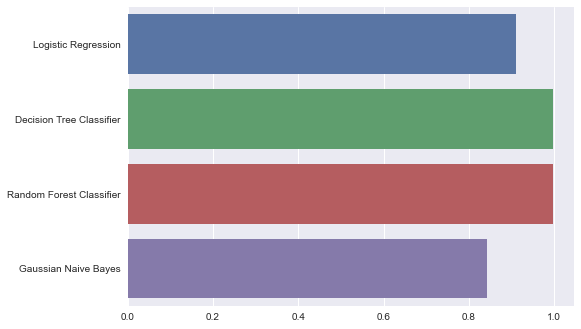

In [53]:
#visualizing the train model accuracy 

sns.barplot(y=models,x=train_acc)
plt.show()

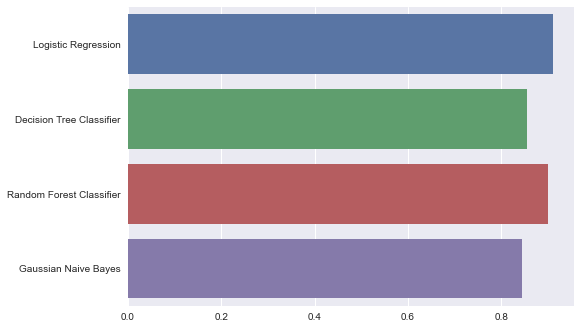

In [54]:
# visualizing the test model accuracy 


sns.barplot(y=models,x=test_acc)
plt.show()

A summary of the training and testing accuracies were also printed and visualised showing the accuracies of all the models with random forest classifier and logistic regression being the better performing models.

In [55]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()


model_dict = {'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

{'Model': [LogisticRegression(),
  DecisionTreeClassifier(),
  RandomForestClassifier(),
  GaussianNB()],
 'Train Score': [0.9102467964519644,
  0.9969839211510815,
  0.9969134907384007,
  0.8426750299329254],
 'Test Score': [0.9103473419064033,
  0.8550642980246587,
  0.8991283309028238,
  0.8443424366962747]}

In [56]:
model_summary = pd.DataFrame({'Model':model_names,'Train Score':train_acc,'Test Score':test_acc})
model_summary

,Model,Train Score,Test Score
0,Logistic Regression,0.910247,0.910347
1,Decision Tree,0.996984,0.855064
2,Random Forest,0.996913,0.899128
3,Gaussian Naive Bayes,0.842675,0.844342


A ROC curve was also generated and displayed in a single plot displaying the false positive and true positive rates in the curve using the actual test labels, that is the ‘y_test’ and the predicted probabilities ‘y_pred_prob’ as inputs for the curve.

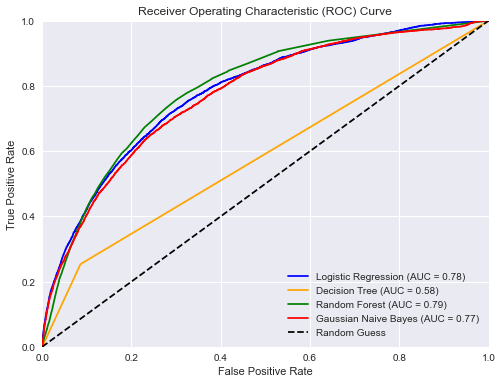

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

model_list = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train_scaler, y_train)
    y_pred_prob = model.predict_proba(x_test_scaler)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# MODEL PERFORMANCE ENHANCEMENT

In order to improve the performance of the models, performance enhancement techniques such as undersampling, Stratified K cross validation as well as hyperparameter tuning were employed so as to address the issue of imbalance in the target variable as well in improve on the performance of the models.

APPLYING UNDERSAMPLING TECHNIQUE 

Undersampling was applied to the target variable in order to avoid bias in the predictions of the models.The shape of the undersampled set was also printed to get an overview of the resampled set.

In [58]:
#Undersampling the target variable wich is Heart Disease
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = kwaku['HeartDisease'] # target variable

# Separate majority and minority classes
majority_class = kwaku[y == 0]
minority_class = kwaku[y == 1]

# Undersample majority class
undersampled_majority = resample(majority_class,
                                 replace=False, # sampling without replacement
                                 n_samples=len(minority_class), # set the number of samples to match the minority class
                                 random_state=42) # for reproducibility

# Combine minority class and undersampled majority class
undersampled_kwaku = pd.concat([minority_class, undersampled_majority])

# Shuffle the data
undersampled_kwaku = undersampled_kwaku.sample(frac=1, random_state=42)

# Split into training and testing sets
x = undersampled_kwaku.drop('HeartDisease', axis=1) # feature variables
y = undersampled_kwaku['HeartDisease'] # target variable
x_train_scaled, x_test_scaled, y_train_resampled, y_test_resampled = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the training and testing data separately
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_scaled)
x_test_scaled = scaler.transform(x_test_scaled)

# Convert the scaled arrays to Pandas DataFrames with feature names
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)

# Print the shapes of the new datasets
print("Shape of undersampled_kwaku:", undersampled_kwaku.shape)
print("Shape of X_train_scaled:", x_train_scaled.shape)
print("Shape of X_test_scaled:", x_test_scaled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of y_test_resampled:", y_test_resampled.shape)


Shape of undersampled_kwaku: (54522, 18)
Shape of X_train_scaled: (43617, 17)
Shape of X_test_scaled: (10905, 17)
Shape of y_train_resampled: (43617,)
Shape of y_test_resampled: (10905,)


After undersampling was applied to the target variable, it was visualized to see the effect that undersampling had on the target variable and it was obvious that there was no issue of clas imbalance in the target variable any longer.

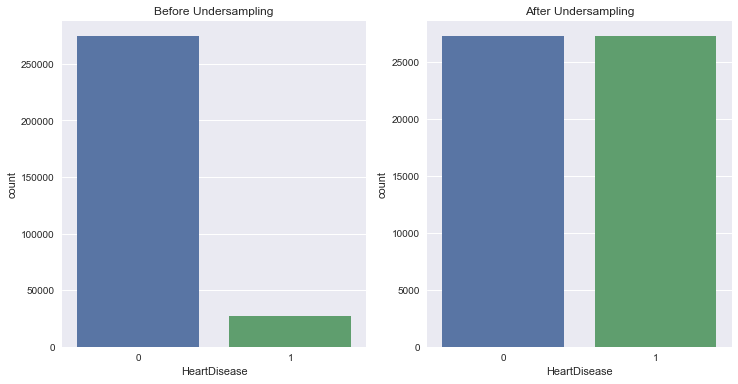

In [59]:
# Plot distribution of target variable before and after undersampling
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.countplot(data=kwaku, x='HeartDisease', ax=axs[0])
axs[0].set_title('Before Undersampling')
sns.countplot(data=undersampled_kwaku, x='HeartDisease', ax=axs[1])
axs[1].set_title('After Undersampling')
plt.show()


In [60]:
from sklearn.model_selection import KFold, cross_val_score

# Create a list of models
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42)
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, x_train_scaled, y_train_resampled, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")


Accuracy for DecisionTreeClassifier: [0.66368638 0.67549289 0.66594062 0.65814513 0.6650235 ]
Average accuracy for DecisionTreeClassifier: 0.6656577053932005

Accuracy for RandomForestClassifier: [0.7330353  0.75229253 0.73804884 0.73609997 0.74263441]
Average accuracy for RandomForestClassifier: 0.7404222096106553

Accuracy for GaussianNB: [0.67961944 0.68867492 0.68921243 0.6818755  0.6786656 ]
Average accuracy for GaussianNB: 0.6836095771097012

Accuracy for LogisticRegression: [0.70541036 0.72042641 0.70893041 0.71191104 0.70709618]
Average accuracy for LogisticRegression: 0.7107548816514474



In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Define the hyperparameter search space for each model
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Instantiate each model
dt = DecisionTreeClassifier(random_state=32)
lr = LogisticRegression(random_state=32)
rf = RandomForestClassifier(random_state=32)
gnb = GaussianNB()

APPLYING STRATIFIED K-FOLD CROSS VALIDATION

Stratified K-fold cross validation was performed with on all the models. The ‘StratifiedKFold’ function was used in order to make sure that every fold contained the same proportion for each class just like the original dataset. The cross-validation results which are used to compare the testing accuracy for every model is displayed using a ‘boxplot’ printing out the training accuracy as well as the evaluation metrics for each model. An observation that was drawn from the visualisation below is that Random Forest had the highest accuracy indicating that it performed well on the training set.




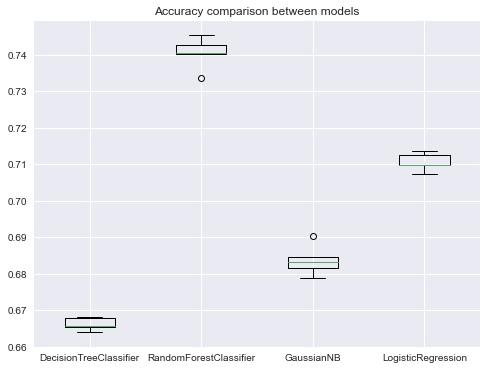

Training Accuracy for DecisionTreeClassifier: 0.999
Evaluation metrics for DecisionTreeClassifier:
Accuracy: 0.666
Precision: 0.666
Recall: 0.666
F1-score: 0.666
ROC AUC: 0.666

Training Accuracy for RandomForestClassifier: 0.999
Evaluation metrics for RandomForestClassifier:
Accuracy: 0.740
Precision: 0.741
Recall: 0.741
F1-score: 0.740
ROC AUC: 0.809

Training Accuracy for GaussianNB: 0.684
Evaluation metrics for GaussianNB:
Accuracy: 0.684
Precision: 0.697
Recall: 0.683
F1-score: 0.678
ROC AUC: 0.770

Training Accuracy for LogisticRegression: 0.711
Evaluation metrics for LogisticRegression:
Accuracy: 0.711
Precision: 0.712
Recall: 0.710
F1-score: 0.710
ROC AUC: 0.785



In [62]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Create a list of models
models = [
    DecisionTreeClassifier(random_state=32),
    RandomForestClassifier(random_state=32),
    GaussianNB(),
    LogisticRegression(random_state=32, max_iter=1000)
]

# Perform Stratified k-fold cross-validation with k=5 for each model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'roc_auc': 'roc_auc'
}
results = {}
for model in models:
    cv_results = cross_validate(model, x_train_scaled, y_train_resampled, cv=skf, scoring=scoring, return_train_score=True) # add return_train_score=True
    results[model.__class__.__name__] = cv_results

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([results[model.__class__.__name__]['test_accuracy'] for model in models], labels=[model.__class__.__name__ for model in models])
ax.set_title('Accuracy comparison between models')
plt.show()

# Print the evaluation metrics
for model_name, model_results in results.items():
    print(f"Training Accuracy for {model_name}: {model_results['train_accuracy'].mean():.3f}")
    print(f"Evaluation metrics for {model_name}:")
    print(f"Accuracy: {model_results['test_accuracy'].mean():.3f}")
    print(f"Precision: {model_results['test_precision'].mean():.3f}")
    print(f"Recall: {model_results['test_recall'].mean():.3f}")
    print(f"F1-score: {model_results['test_f1'].mean():.3f}")
    print(f"ROC AUC: {model_results['test_roc_auc'].mean():.3f}\n")


A confusion matrix is generated for the models based on the resampled training set and the testing set which displays the true positive, false positive, true negative and false negative of the actual labels in the rows and the predicted labels in the columns.

In [63]:
from sklearn.metrics import confusion_matrix

for model_name, model_results in results.items():
    model = next(filter(lambda m: m.__class__.__name__ == model_name, models))
    y_pred = model.fit(x_train_scaled, y_train_resampled).predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for {model_name}:")
    print(cm)
    print()

Confusion matrix for DecisionTreeClassifier:
[[18844 36007]
 [ 2583  2910]]

Confusion matrix for RandomForestClassifier:
[[35552 19299]
 [ 4093  1400]]

Confusion matrix for GaussianNB:
[[    0 54851]
 [    0  5493]]

Confusion matrix for LogisticRegression:
[[32312 22539]
 [ 1525  3968]]



The performance of models was summarised together with their training and testing accuracy and printed out for the sake of comparative analysis.

In [64]:
import pandas as pd

# Create a dictionary to store the results
accuracy_results = {'Model': [], 'Training Accuracy': [], 'Testing Accuracy': []}

# Iterate through each model and store the accuracy results
for model_name, model_results in results.items():
    accuracy_results['Model'].append(model_name)
    accuracy_results['Training Accuracy'].append(model_results['train_accuracy'].mean())
    accuracy_results['Testing Accuracy'].append(model_results['test_accuracy'].mean())

# Create a pandas dataframe from the accuracy results dictionary
accuracy_df = pd.DataFrame.from_dict(accuracy_results)

# Print the accuracy dataframe
print(accuracy_df)


                    Model  Training Accuracy  Testing Accuracy
0  DecisionTreeClassifier           0.998756          0.666208
1  RandomForestClassifier           0.998710          0.740422
2              GaussianNB           0.683759          0.683656
3      LogisticRegression           0.710766          0.710595


The training and testing accuracy of all the models was then visualized in a clustered bar chart to show a comparison of the accuracy of both resampled training set and testing set. And an observation drawn from this visualization is that random forest was the model that performed better on both the resampled training set and the testing set as well.

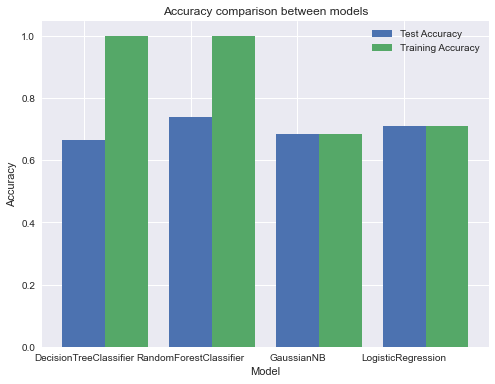

In [65]:
import matplotlib.pyplot as plt

# Extract the test accuracies for each model
test_accuracies = [results[model_name]['test_accuracy'].mean() for model_name in results]

# Extract the training accuracies for each model
train_accuracies = [results[model_name]['train_accuracy'].mean() for model_name in results]

# Create a bar chart to visualize the accuracies
fig, ax = plt.subplots(figsize=(8,6))
x_pos = [i for i in range(len(models))]
ax.bar(x_pos, test_accuracies, width=0.4, align='center', label='Test Accuracy')
ax.bar([i+0.4 for i in x_pos], train_accuracies, width=0.4, align='center', label='Training Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels([model.__class__.__name__ for model in models])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy comparison between models')
ax.legend()
plt.show()


Then a ROC curve was generated and displayed using the resampled training set and the testing set, with the false positive rate and the true positive rate as variables and the actual test labels and the predicted probabilities as input values

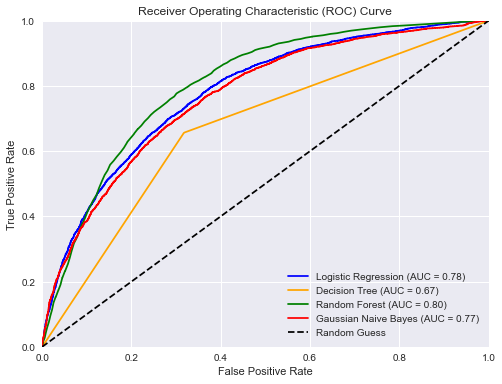

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

model_list = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train_scaled, y_train_resampled)
    y_pred_prob = model.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_prob)
    auc = roc_auc_score(y_test_resampled, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# FEATURE IMPORTANCE 

After random forest was selected as the better performing model, a feature importance was generated using the random forest feature importance classifiers by displaying an array of values from 0 to 1 with a higher corresponding value indicating an important feature. This was done in order to figure out and understand the indicators that indeed play a key role in the prediction of heart disease using the selected model. 

In [67]:
rf = RandomForestClassifier()
rf_model = rf.fit(x_train_scaled, y_train_resampled)
feature_importances = rf_model.feature_importances_
print(feature_importances)


[0.24452685 0.0214805  0.01014527 0.02855305 0.06914825 0.05569998
 0.0433452  0.02791566 0.19883384 0.03604802 0.03909015 0.0215684
 0.07046884 0.0866512  0.01835961 0.01213414 0.01603102]


In [68]:
importances = pd.DataFrame(x_train.columns,columns=['Features'])
importances

,Features
0,BMI
1,Smoking
2,AlcoholDrinking
3,Stroke
4,PhysicalHealth
5,MentalHealth
6,DiffWalking
7,Sex
8,AgeCategory
9,Race


In [69]:
importances['Feature_importances'] = rf_model.feature_importances_
importances

,Features,Feature_importances
0,BMI,0.244527
1,Smoking,0.021481
2,AlcoholDrinking,0.010145
3,Stroke,0.028553
4,PhysicalHealth,0.069148
5,MentalHealth,0.055700
6,DiffWalking,0.043345
7,Sex,0.027916
8,AgeCategory,0.198834
9,Race,0.036048


In [70]:
imp = importances.sort_values(by='Feature_importances',ascending=False)
imp

,Features,Feature_importances
0,BMI,0.244527
8,AgeCategory,0.198834
13,SleepTime,0.086651
12,GenHealth,0.070469
4,PhysicalHealth,0.069148
5,MentalHealth,0.055700
6,DiffWalking,0.043345
10,Diabetic,0.039090
9,Race,0.036048
3,Stroke,0.028553


A bar chart was plotted to display the features that are important and can be considered as key indicators in the prediction of whether or not an individual has heart disease. An observation that can be drawn from the visualisation is that the weight of an individual as well as the age and amount of sleep that an individual gets can all contribute to issues that will lead eventually lead to a heart disease and although excessive alcohol drinking can be detrimental to one's health, it does not necessarily serve as a key indicator in the prediction of heart disease.

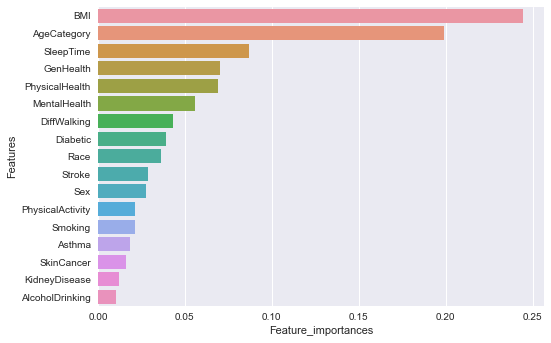

In [71]:
sns.barplot(y=imp['Features'],x=imp['Feature_importances'])
plt.show()

In [72]:
# Important Features according to above mentioned Barplot:

imp['Features'][0:7].values

array(['BMI', 'AgeCategory', 'SleepTime', 'GenHealth', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking'], dtype=object)